In [30]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target)=keras.datasets.fashion_mnist.load_data()
train_scaled=train_input.reshape(-1,28,28,1)/255.0
train_scaled, val_scaled, train_target, val_target=train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

In [31]:
model=keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28,28,1)))

In [32]:
model.add(keras.layers.MaxPooling2D(2))

In [33]:
model.add(keras.layers.Conv2D(64, kernel_size=3, activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2))

In [34]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))

In [35]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               313700    
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)              

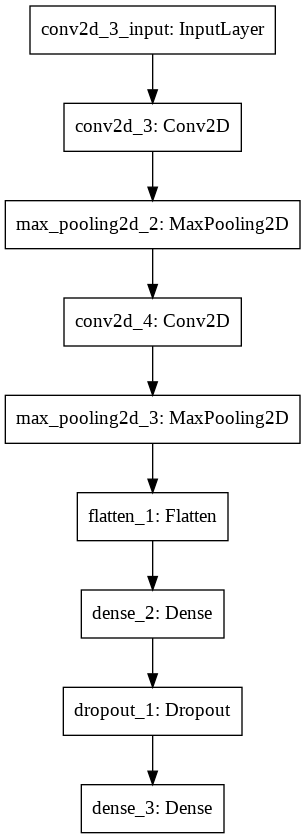

In [36]:
keras.utils.plot_model(model)

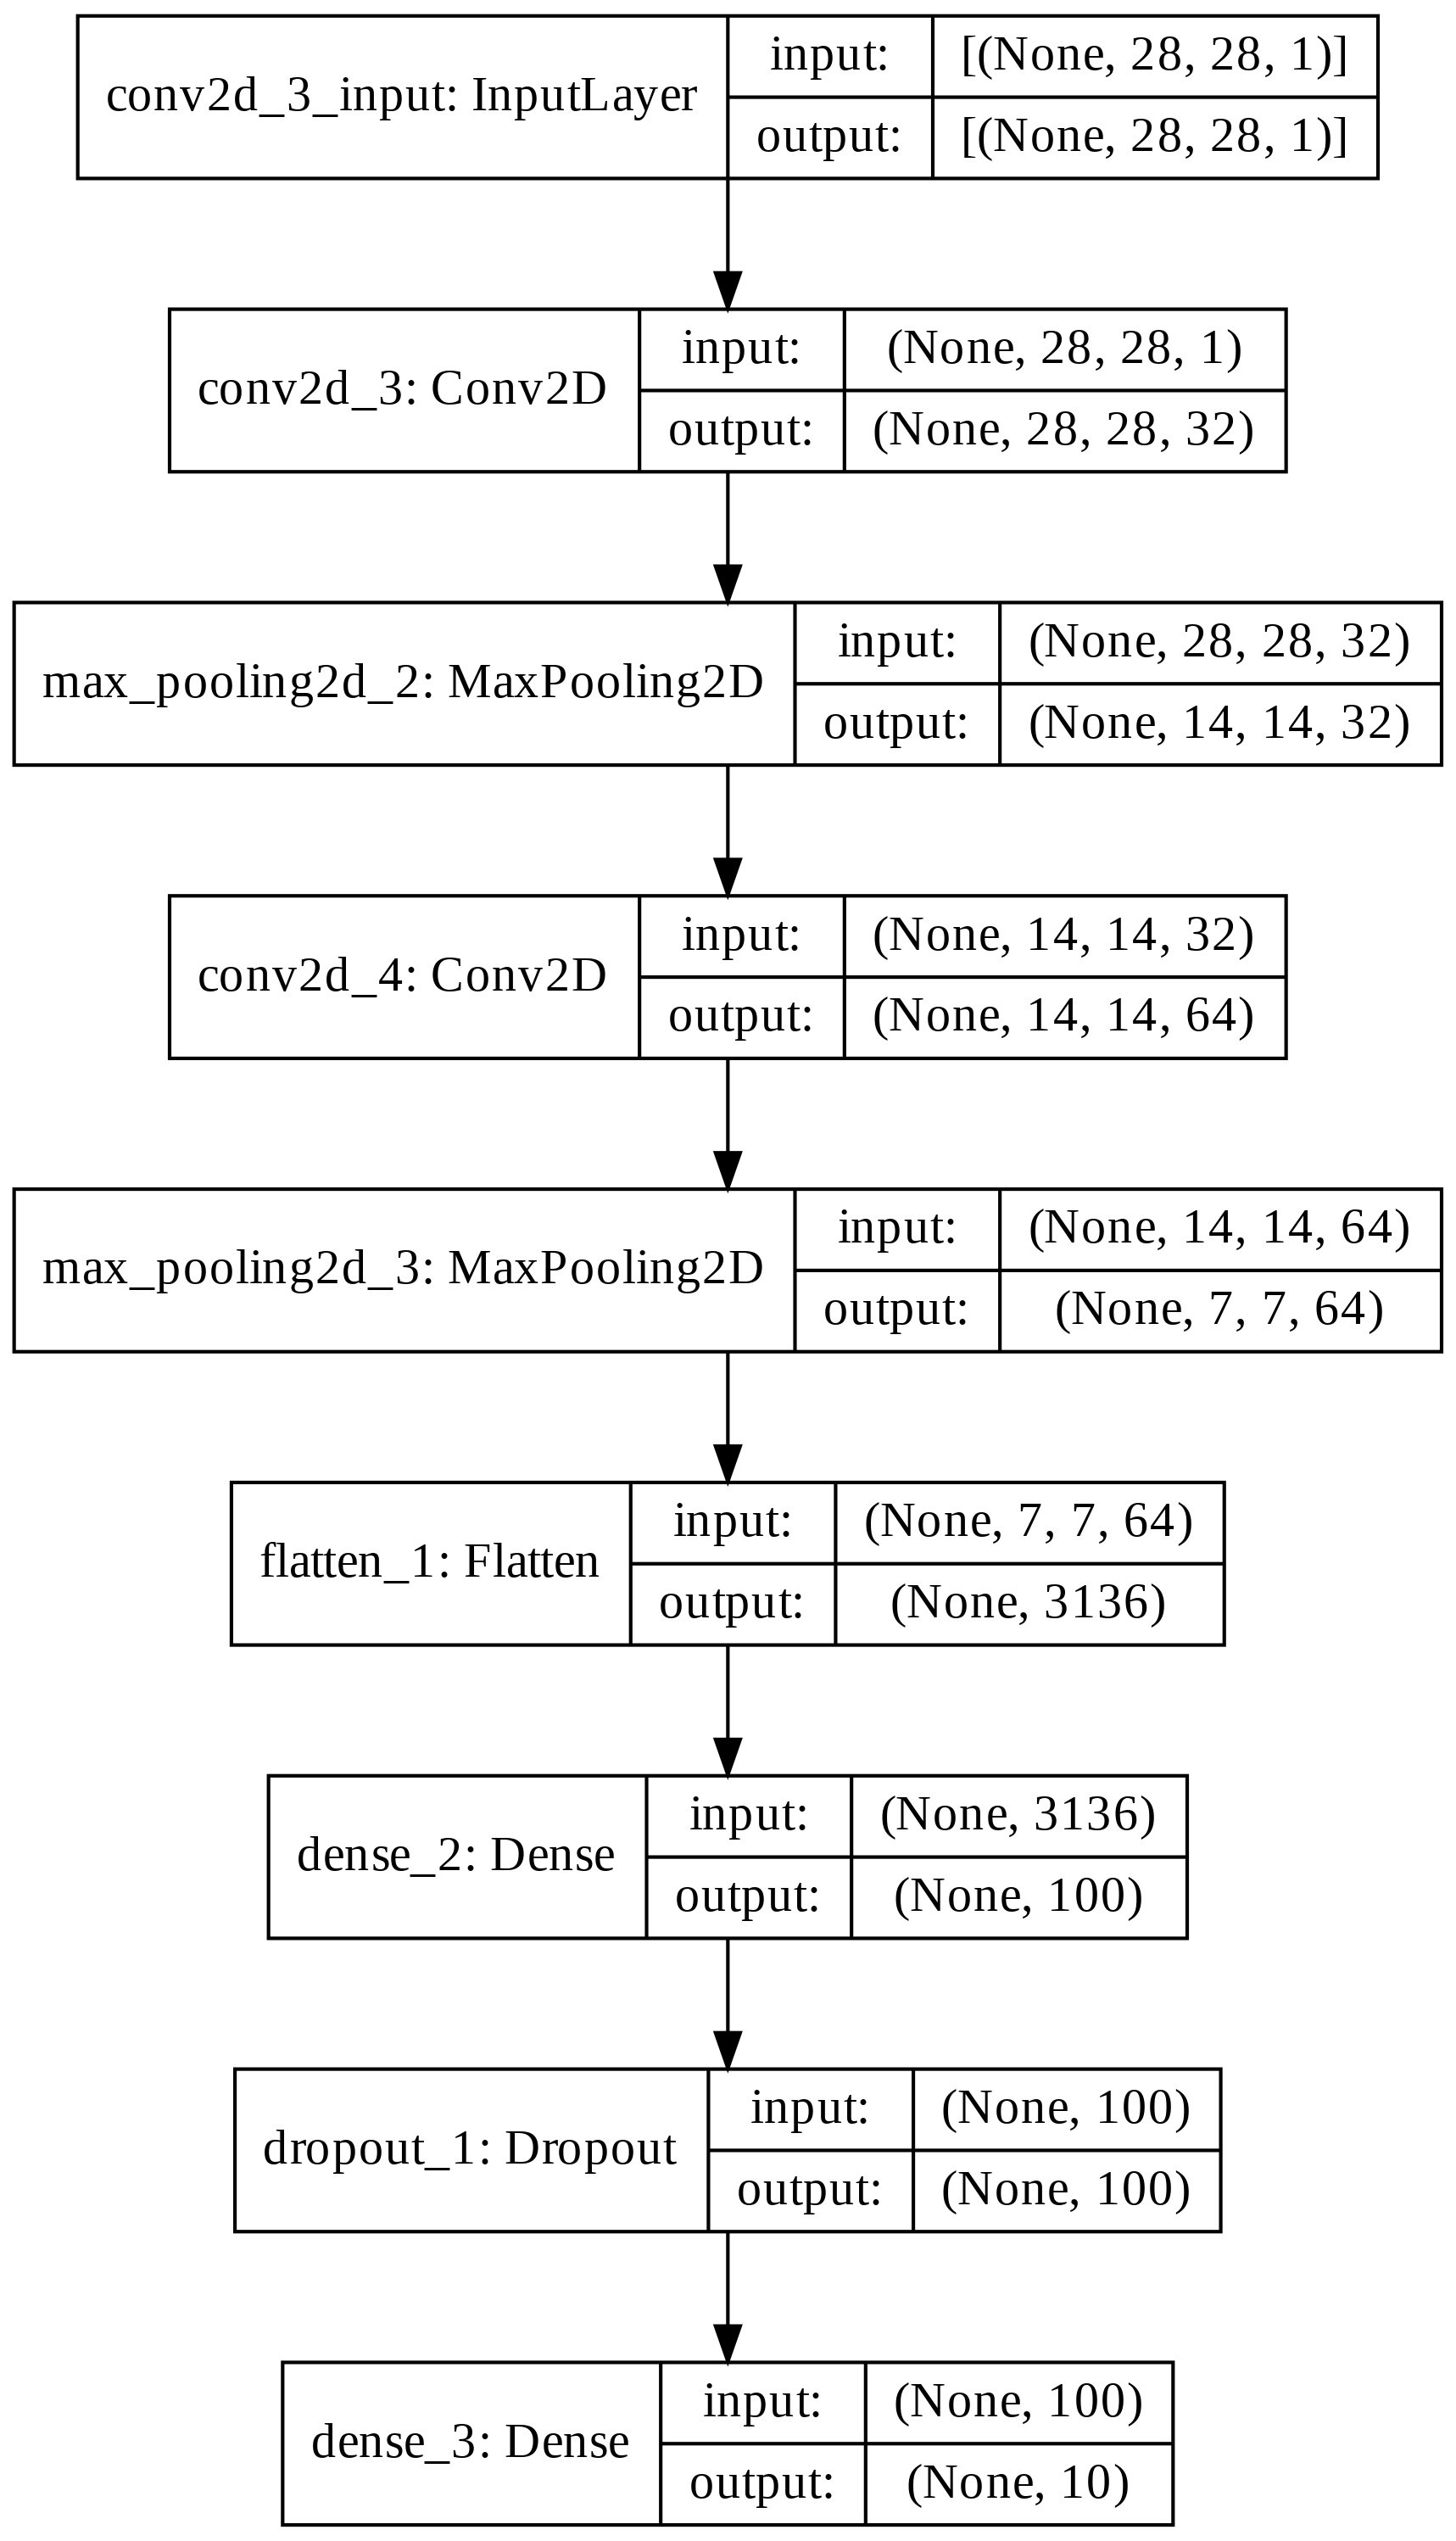

In [37]:
keras.utils.plot_model(model, show_shapes=True, to_file='cnn-architecture.png', dpi=300)

In [38]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
checkpoint_cb=keras.callbacks.ModelCheckpoint('best-cnn-model.h5')
early_stopping_cb=keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history=model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 67s 44ms/step - loss: 0.5147 - accuracy: 0.8131 - val_loss: 0.3295 - val_accuracy: 0.8781
Epoch 2/20
1500/1500 [==============================] - 65s 44ms/step - loss: 0.3474 - accuracy: 0.8745 - val_loss: 0.2832 - val_accuracy: 0.8931
Epoch 3/20
1500/1500 [==============================] - 65s 44ms/step - loss: 0.2940 - accuracy: 0.8929 - val_loss: 0.2563 - val_accuracy: 0.9035
Epoch 4/20
1500/1500 [==============================] - 64s 42ms/step - loss: 0.2612 - accuracy: 0.9056 - val_loss: 0.2398 - val_accuracy: 0.9100
Epoch 5/20
1500/1500 [==============================] - 63s 42ms/step - loss: 0.2352 - accuracy: 0.9140 - val_loss: 0.2217 - val_accuracy: 0.9160
Epoch 6/20
1500/1500 [==============================] - 65s 43ms/step - loss: 0.2156 - accuracy: 0.9210 - val_loss: 0.2261 - val_accuracy: 0.9152
Epoch 7/20
1500/1500 [==============================] - 63s 42ms/step - loss: 0.1968 - accuracy: 0.9270 - val_loss: 0.2190 -

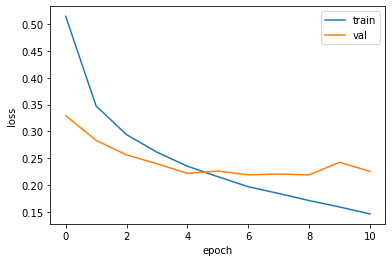

In [39]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [40]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 4s 11ms/step - loss: 0.2189 - accuracy: 0.9208


[0.21886539459228516, 0.9207500219345093]

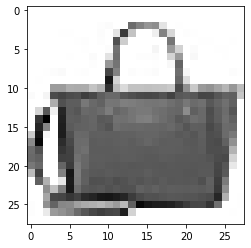

In [41]:
plt.imshow(val_scaled[0].reshape(28,28), cmap='gray_r')
plt.show()

In [42]:
preds=model.predict(val_scaled[0:1])
print(preds)

[[1.8855516e-22 6.2025532e-33 3.0436623e-27 1.4869586e-29 8.5184100e-25
  2.2105022e-24 8.6799703e-23 3.1893205e-25 1.0000000e+00 4.3739379e-27]]


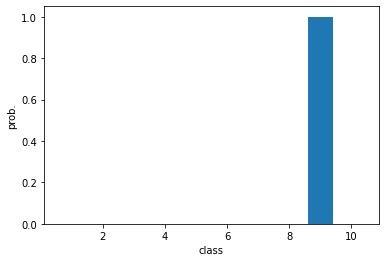

In [43]:
plt.bar(range(1,11),preds[0])
plt.xlabel('class')
plt.ylabel('prob.')
plt.show()

In [44]:
classes=['티셔츠','바지','스웨터','드레스','코트','샌달','셔츠','스니커즈','가방','앵클 부츠']
import numpy as np
print(classes[np.argmax(preds)])

가방


In [45]:
test_scaled=test_input.reshape(-1,28,28,1)/255.0
model.evaluate(test_scaled, test_target)

313/313 [==============================] - 4s 12ms/step - loss: 0.2427 - accuracy: 0.9163


[0.24272558093070984, 0.9162999987602234]

In [46]:
from tensorflow import keras
model=keras.models.load_model('best-cnn-model.h5')

In [47]:
model.layers

In [48]:
conv=model.layers[0]
print(conv.weights[0].shape, conv.weights[1].shape)

(3, 3, 1, 32) (32,)


In [49]:
conv_weights=conv.weights[0].numpy()
print(conv_weights.mean(), conv_weights.std())

-0.022745477 0.27943972


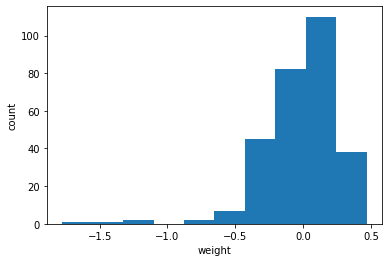

In [50]:
import matplotlib.pyplot as plt
plt.hist(conv_weights.reshape(-1,1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

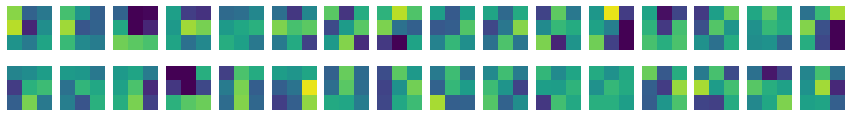

In [51]:
fig, axs=plt.subplots(2,16,figsize=(15,2))
for i in range(2):
    for j in range(16):
        axs[i,j].imshow(conv_weights[:,:,0,i*16+j], vmin=-0.5, vmax=0.5)
        axs[i,j].axis('off')
plt.show()

In [52]:
no_training_model=keras.Sequential()
no_training_model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28,28,1)))

no_training_conv=no_training_model.layers[0]
print(no_training_conv.weights[0].shape)

(3, 3, 1, 32)


In [53]:
no_training_weights=no_training_conv.weights[0].numpy()
print(no_training_weights.mean(), no_training_weights.std())

-0.0011764081 0.08396185


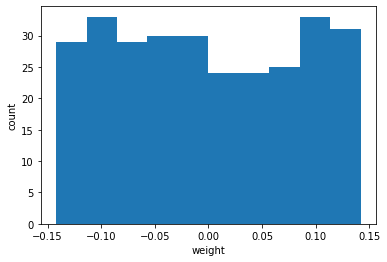

In [54]:
plt.hist(no_training_weights.reshape(-1,1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

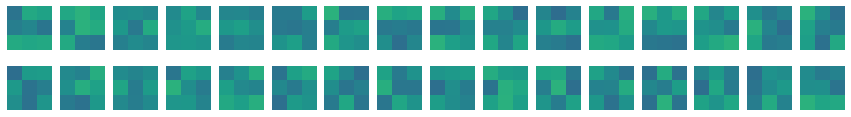

In [55]:
fig, axs=plt.subplots(2,16, figsize=(15,2))
for i in range(2):
    for j in range(16):
        axs[i,j].imshow(no_training_weights[:,:,0,i*16+j],vmin=-0.5, vmax=0.5)
        axs[i,j].axis('off')
plt.show()

In [56]:
print(model.input)

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='conv2d_3_input'), name='conv2d_3_input', description="created by layer 'conv2d_3_input'")


In [59]:
conv_acti=keras.Model(model.input, model.layers[0].output)

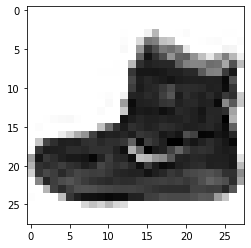

In [57]:
(train_input, train_target), (test_input, test_target)=keras.datasets.fashion_mnist.load_data()
plt.imshow(train_input[0], cmap='gray_r')
plt.show()

In [60]:
inputs=train_input[0:1].reshape(-1,28,28,1)/255.0
feature_maps=conv_acti.predict(inputs)

In [61]:
print(feature_maps.shape)

(1, 28, 28, 32)


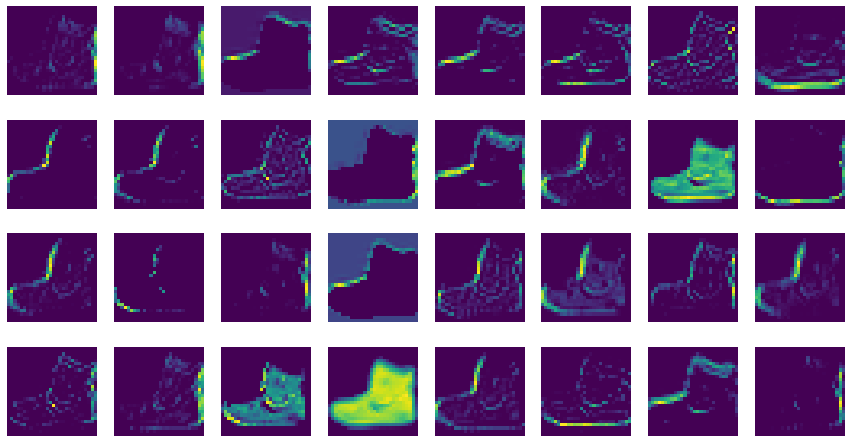

In [63]:
fig, axs=plt.subplots(4,8,figsize=(15,8))
for i in range(4):
    for j in range(8):
        axs[i,j].imshow(feature_maps[0,:,:,i*8+j])
        axs[i,j].axis('off')
plt.show()

In [64]:
conv2_acti=keras.Model(model.input, model.layers[2].output)
inputs=train_input[0:1].reshape(-1,28,28,1)/255.0
feature_maps=conv2_acti.predict(inputs)
print(feature_maps.shape)

(1, 14, 14, 64)


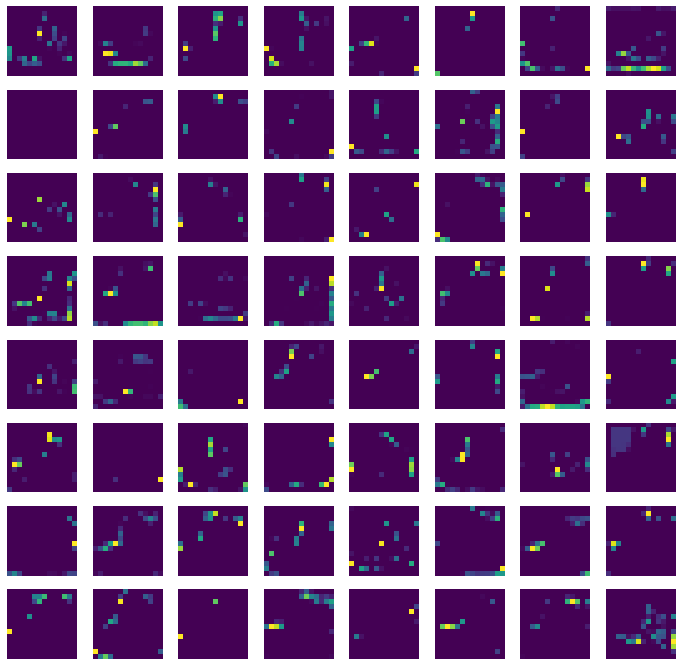

In [65]:
fig, axs=plt.subplots(8,8,figsize=(12,12))
for i in range(8):
    for j in range(8):
        axs[i,j].imshow(feature_maps[0,:,:,i*8+j])
        axs[i,j].axis('off')
plt.show()